## Part 3 Loading Data & EDA

Import relevant packages for the following parts

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from preprocessing import get_processed_data
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [2]:
moria_df_loaded=get_processed_data('moria-data')


loading files...
C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data/
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 1.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 10.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 2.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business School/Kick-Ass Master Thesis - General/Data/moria-data/Raw Data\Sheet 3.csv
Reading file: C:\Users\nikodemicek\Documents\GitHub\refugee_project/../../../CBS - Copenhagen Business Scho

In [3]:
#to avoid reloading and preprocessing data
moria_df = moria_df_loaded.copy()

# reset index
moria_df.reset_index(drop=True, inplace=True)
#maybe we should keep the one with highest Reach? or other metric?
moria_df.sort_values(by='Reach',ascending=False,ignore_index=True, inplace=True)

moria_df.shape
#moria_df.head()

(188728, 32)

In [4]:

#remove all duplicate tweets (should be in preprocessing file?)
moria_df.drop_duplicates(subset ="Tweet Raw", inplace = True) 
moria_df.shape




(56898, 32)

In [5]:
moria_df["Tweet Clean"].value_counts()

rt   hi  euhomeaffairs  interieur gouv  bmi bund  ministeriejenv  ukhomeoffice  moria has burned down   this humanitarian catastrophe calls for urgent action  relocate refugees from camps on the greek islands before further tragedies happen   refugeeswelcome  leavenoonebehind                                                112
moria migrants  fire destroys greece s camp on lesbos                                                                                                                                                                                                                                                                                96
moria migrants  european countries agree to take minors after fire                                                                                                                                                                                                                                                                   93
 it s unbearable

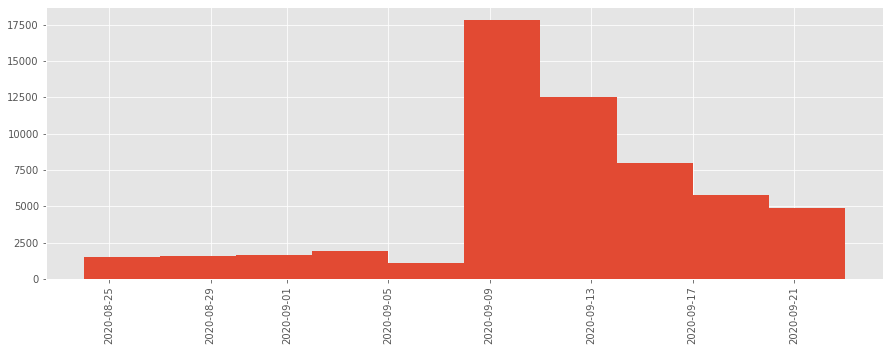

In [6]:

#type(contents)

#set short date as index
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
moria_df = moria_df.set_index(moria_df['Date Short'])
moria_df = moria_df.sort_index()

#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

In [7]:
event_date = '2020-09-08'


# create train test partition
pre_event = moria_df[:event_date]
post_event  = moria_df[event_date:]


#pre_event = moria_df.loc(moria_df['Date Short'] < event_date)
#post_event = moria_df.loc(moria_df['Date Short']>= event_date)

print('Pre event tweets: ',pre_event.shape[0])
print('Post event tweets: ',post_event.shape[0])


Pre event tweets:  8343
Post event tweets:  49055


In [8]:

#pre_event.info()
pre_event.sort_values(by='Reach',ascending=False,ignore_index=True)
#post_event['Reach'].sort_values()

#pre_event.head(10)

,Date,URL,Tweet Raw,Influencer,Country,Language,Reach,Engagement,AVE,Sentiment,...,Time,State,City,Hashtags,Mentions,Linked Content,Retweet,Quote Tweet,Tweet Clean,Tweet Clean Tokens
0,02-Sep-2020 03:45PM,https://twitter.com/nytimes/statuses/130115420...,Greece reported the first case of the coronavi...,@nytimes,United States,English,47230169,NaN,436879.06,Neutral,...,3:45 PM,New York,New York City,[],[],"[https://t.co/WQMXjTzjKT, https://t.co/qKob3IO...",False,False,greece reported the first case of the coronavi...,"[greece, reported, first, case, coronavirus, m..."
1,31-Aug-2020 09:58PM,https://twitter.com/BBCWorld/statuses/13005233...,"Almost 900,000 migrants arrived in Greece back...",@bbcworld,United Kingdom,English,28853971,NaN,266899.23,Neutral,...,9:58 PM,England,London,[],[bbclysedoucet],"[https://t.co/2cKYHmC4tr, https://t.co/rkAh53y...",False,False,almost migrants arrived in greece back...,"[almost, migrant, arrived, greece, back, sympa..."
2,08-Sep-2020 08:28PM,https://twitter.com/ABC/statuses/1303399711706...,A major testing and contact-tracing operation ...,@abc,United States,English,15881161,NaN,146900.74,Neutral,...,8:28 PM,New York,New York City,[],[],[https://t.co/Im6pGHULY7],False,False,a major testing and contact tracing operation ...,"[major, testing, contact, tracing, operation, ..."
3,02-Sep-2020 04:18PM,https://twitter.com/ABC/statuses/1301162532984...,LATEST: Greece announces it is imposing a two-...,@abc,United States,English,15870455,NaN,146801.71,Neutral,...,4:18 PM,New York,New York City,[],[],[https://t.co/Ivp2goh2e6],False,False,latest greece announces it is imposing a two ...,"[latest, greece, announces, imposing, week, lo..."
4,08-Sep-2020 03:27PM,https://twitter.com/AP/statuses/13033239768574...,RT @AP_Europe: A major testing and contact-tra...,@ap,Unknown,English,14408559,NaN,133279.17,Neutral,...,3:27 PM,NaN,NaN,[],[AP_Europe],[https://t.co/hhRmMkNdd2],True,False,rt a major testing and contact tracing opera...,"[major, testing, contact, tracing, operation, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,31-Aug-2020 01:51AM,https://twitter.com/nfourtakas/statuses/130021...,@oruchandemirci @tomyork5 @AveeCaaesar Your di...,@nfourtakas,Unknown,English,1,NaN,0.01,Negative,...,1:51 AM,NaN,NaN,[],"[oruchandemirci, tomyork5, AveeCaaesar]",[],False,False,oruchandemirci tomyork aveecaaesar your di...,"[oruchandemirci, tomyork, aveecaaesar, dirty, ..."
8339,02-Sep-2020 11:00PM,http://twitter.com/Canbr8/statuses/13012637046...,QT @Name1Pls: #Europe #France #Germany #Englan...,@Canbr8,Unknown,English,1,0.0,0.01,Neutral,...,11:00 PM,NaN,NaN,"[Europe, France, Germany, England, Belgium, Ne...",[Name1Pls],[https://t.co/TXvBmcijje],False,True,qt europe france germany england belgiu...,"[europe, france, germany, england, belgium, ne..."
8340,03-Sep-2020 07:44AM,https://twitter.com/EmmanuelEricks7/statuses/1...,"Over 10,000 migrants stopped from entering Gre...",@emmanuelericks7,Unknown,English,1,NaN,0.01,Neutral,...,7:44 AM,NaN,NaN,[],[],[https://t.co/0D7Dr7X5ke],False,False,over migrants stopped from entering gre...,"[migrant, stopped, entering, greece, year]"
8341,29-Aug-2020 09:40PM,https://twitter.com/moon44_star/statuses/12997...,@slmcnm__ @thesspeter0 @izmirliseyfi1 @Epeisod...,@moon44_star,Unknown,English,1,NaN,0.01,Neutral,...,9:40 PM,NaN,NaN,"[greece, turkey, europa]","[slmcnm__, thesspeter0, izmirliseyfi1, Epeisod...",[],False,False,slmcnm thesspeter izmirliseyfi epeisod...,"[slmcnm, thesspeter, izmirliseyfi, epeisodiaon..."


Also delete duplicate tweets. 

---

### EDA

what features can we do:
length of tweet (words, characters) (int)
length of cleaned tweet (words) (int)
hashtags used (list)
no. of hashtags (int)


In [9]:
pd.set_option('display.max_colwidth',None)
print(moria_df['Tweet Raw'].loc[[10]])
print(moria_df['Tweet Clean'].loc[[10]])

KeyError: "None of [DatetimeIndex(['1970-01-01 00:00:00.000000010'], dtype='datetime64[ns]', name='Date Short', freq=None)] are in the [index]"

In [10]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = False, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





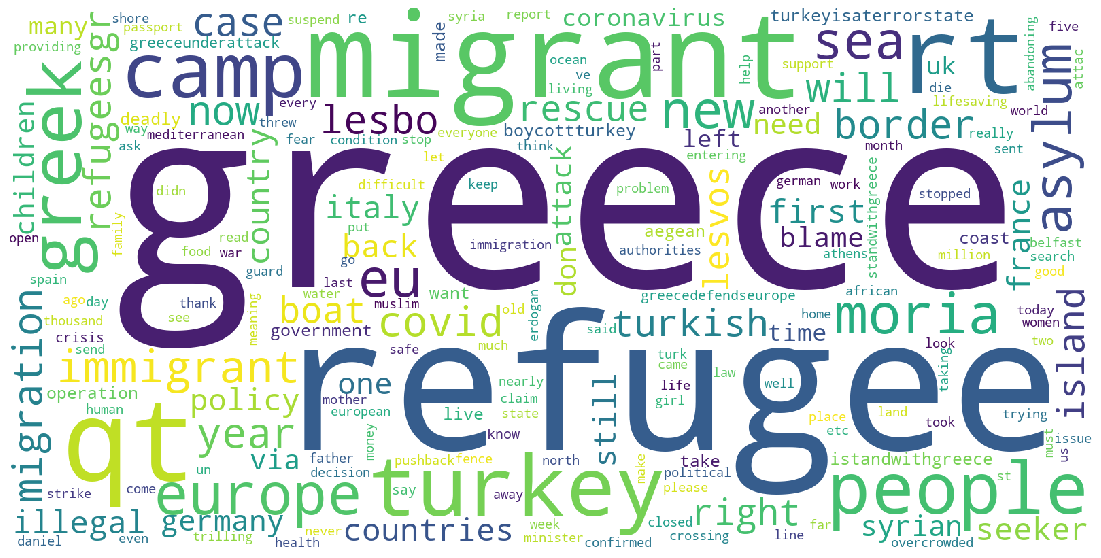

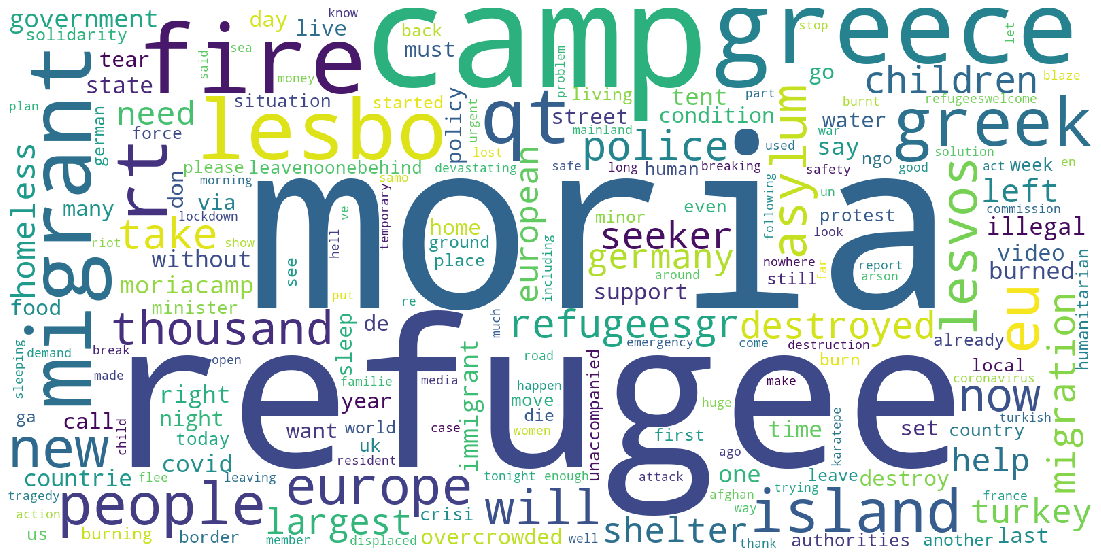

In [11]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [12]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


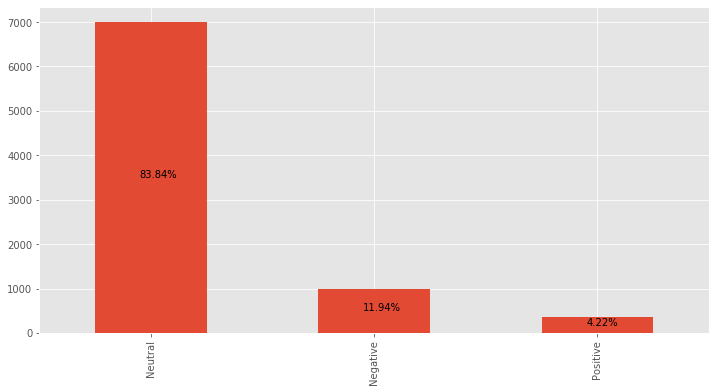

In [13]:
#we should make our own sentiment analysis

bar_chart(pre_event.Sentiment)

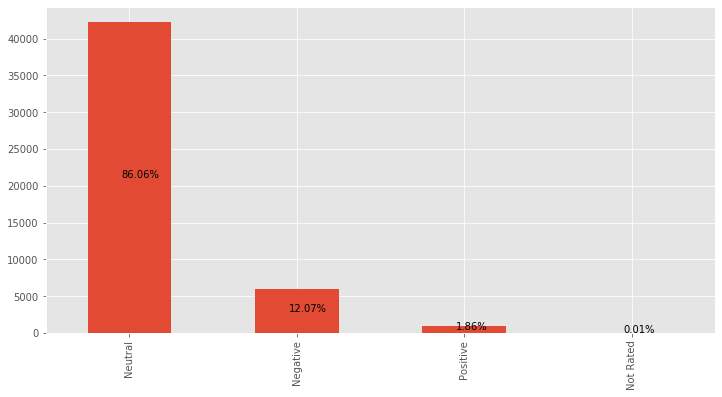

In [14]:
bar_chart(post_event.Sentiment)

In [15]:
moria_df["Country"].value_counts()

Unknown                  23946
United Kingdom            5924
United States             5788
Greece                    4406
Germany                   2111
                         ...  
Niue                         1
Saint Lucia                  1
Sao Tome and Principe        1
Gabon                        1
Brunei Darussalam            1
Name: Country, Length: 193, dtype: int64

In [16]:
moria_df['Reach'].describe()


count    5.689800e+04
mean     8.511577e+04
std      1.205236e+06
min      1.000000e+00
25%      1.810000e+02
50%      1.021000e+03
75%      4.168000e+03
max      5.865150e+07
Name: Reach, dtype: float64

In [17]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

Mean reach: 85115.77
Median reach: 1021.0
Max reach: 58651497


Number of Unique Reach: 13611
Reach Median: 1021.0
count    5.689800e+04
mean     8.511577e+04
std      1.205236e+06
min      1.000000e+00
25%      1.810000e+02
50%      1.021000e+03
75%      4.168000e+03
max      5.865150e+07
Name: Reach, dtype: float64


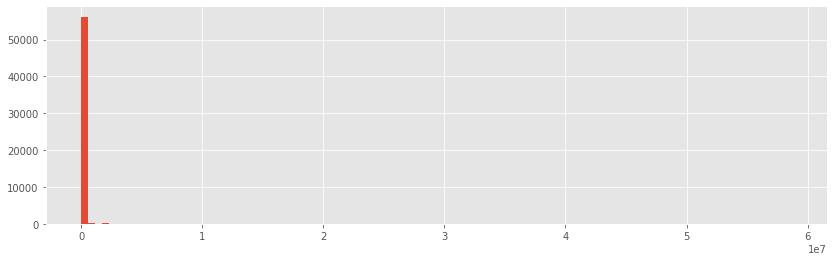

In [18]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()

https://benlevyx.github.io/twitter-polling/eda/

have a similar chart but display how the sentiment/topics (or mixture = combined chart) changes over time (instead of no. of likes)

heatmap for tweets that have several topics, or in overall the correlation of events



# Word2Vec part

In [19]:
pre_event["Tweet Clean Tokens"]

Date Short
2020-08-24                                                                                                                                                                                                             [boiarchy, cynaegeirus, dead, purged, greece, applying, asylum]
2020-08-24                                              [blacklivesmatter, also, alllivesmatter, shame, true, greece, found, secretly, expelled, refugee, recent, month, abandoning, many, around, border, greek, territorial, water, humanrightsviolations, refugee, unhumanrightseu]
2020-08-24                                                                                      [shame, true, greece, found, secretly, expelled, refugee, recent, month, abandoning, many, around, border, greek, territorial, water, humanrightsviolations, refugee, unhumanrightseu]
2020-08-24                                                                                                                                              

In [20]:
from gensim.models import Word2Vec

#pre_event["Tweet Clean Tokens"]


model1 = Word2Vec(sentences=pre_event["Tweet Clean Tokens"],size = 50)

In [21]:
model1.wv.vocab


{'cynaegeirus': <gensim.models.keyedvectors.Vocab at 0x2778e3a20c8>,
 'dead': <gensim.models.keyedvectors.Vocab at 0x2778e3cf748>,
 'greece': <gensim.models.keyedvectors.Vocab at 0x2778e393e48>,
 'applying': <gensim.models.keyedvectors.Vocab at 0x27799634d48>,
 'asylum': <gensim.models.keyedvectors.Vocab at 0x2778e3b3508>,
 'blacklivesmatter': <gensim.models.keyedvectors.Vocab at 0x2778e399588>,
 'also': <gensim.models.keyedvectors.Vocab at 0x2778e3a3fc8>,
 'shame': <gensim.models.keyedvectors.Vocab at 0x2778e3a3c08>,
 'true': <gensim.models.keyedvectors.Vocab at 0x27799634f88>,
 'found': <gensim.models.keyedvectors.Vocab at 0x2778e399508>,
 'secretly': <gensim.models.keyedvectors.Vocab at 0x2778e3a3788>,
 'expelled': <gensim.models.keyedvectors.Vocab at 0x277d21969c8>,
 'refugee': <gensim.models.keyedvectors.Vocab at 0x2778e3a5348>,
 'recent': <gensim.models.keyedvectors.Vocab at 0x2778e3ac688>,
 'month': <gensim.models.keyedvectors.Vocab at 0x2778e3a4d48>,
 'abandoning': <gensim.mode

In [22]:
model1.wv.most_similar("camp",topn=20)

[('moria', 0.9932591915130615),
 ('case', 0.9925897121429443),
 ('covid', 0.9909508228302002),
 ('coronavirus', 0.9902344346046448),
 ('outbreak', 0.9891577363014221),
 ('tested', 0.9867053031921387),
 ('confirmed', 0.9816721677780151),
 ('positive', 0.976538360118866),
 ('infection', 0.9762976169586182),
 ('risen', 0.9717534780502319),
 ('quarantined', 0.9709618091583252),
 ('largest', 0.9681038856506348),
 ('moriacamp', 0.967121958732605),
 ('overcrowded', 0.9670342206954956),
 ('first', 0.9640331268310547),
 ('reported', 0.9612730145454407),
 ('quarantine', 0.960228443145752),
 ('spark', 0.9588711857795715),
 ('test', 0.9569952487945557),
 ('extends', 0.9547531604766846)]

In [23]:
model2 = Word2Vec(sentences=post_event["Tweet Clean Tokens"],size = 50, window=5)

In [24]:
model2.wv.most_similar("camp",topn=20)

[('overnight', 0.737335741519928),
 ('facility', 0.7064838409423828),
 ('large', 0.6707760095596313),
 ('displaced', 0.651339590549469),
 ('notorious', 0.6442817449569702),
 ('overcrowded', 0.630672812461853),
 ('infamous', 0.627687931060791),
 ('nearly', 0.6194588541984558),
 ('completely', 0.6175657510757446),
 ('wednesday', 0.6139011979103088),
 ('housed', 0.6127010583877563),
 ('ripped', 0.6067880392074585),
 ('centre', 0.6011903882026672),
 ('site', 0.5949034094810486),
 ('center', 0.589188277721405),
 ('island', 0.5879523754119873),
 ('almost', 0.5861071348190308),
 ('displacing', 0.5842476487159729),
 ('major', 0.5816465616226196),
 ('notoriously', 0.580362856388092)]

#words that get retweeted the most


#doc2vec on tweets, find clusters

#how word scores have changed, which words remained

#which events "trigger" each particular group the most

#Which words define groups


we could define the biased tweets (in a similar fashion as hate speech detection), then take the words occuring there (or the ones that give most weight to bias) and compare their cosine distance in pre and post event datasets to some keywords (refugee etc.)

We could do a heatmap with words in a similar way as here:

![title](https://pytorch.org/tutorials/_images/sphx_glr_seq2seq_translation_tutorial_004.png)

found on https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

In [35]:
from gensim.models import FastText

model3 = FastText(size = 50, window = 7, min_count = 10)
model3.build_vocab(sentences = pre_event["Tweet Clean Tokens"])
model3.train(sentences = pre_event["Tweet Clean Tokens"], total_examples=len(pre_event["Tweet Clean Tokens"]),epochs = 20)

In [36]:
model3.wv.most_similar("camp",topn=20)

[('campo', 0.9532245397567749),
 ('campaign', 0.8738109469413757),
 ('case', 0.8291928768157959),
 ('covid', 0.8173685073852539),
 ('cash', 0.7717623114585876),
 ('confirmed', 0.759368360042572),
 ('overcrowded', 0.7493928670883179),
 ('moria', 0.7455538511276245),
 ('capacity', 0.7437756657600403),
 ('crowded', 0.7115156650543213),
 ('david', 0.7091051936149597),
 ('evacuated', 0.7061598896980286),
 ('evacuatemoria', 0.6994082927703857),
 ('bundestag', 0.6805949211120605),
 ('lampedusa', 0.6768637895584106),
 ('coronavirus', 0.6659934520721436),
 ('corona', 0.66424161195755),
 ('lockdown', 0.6639753580093384),
 ('hotspot', 0.6626597046852112),
 ('facility', 0.6581019759178162)]

In [37]:

model4 = FastText(size = 50, window = 7, min_count = 10)
model4.build_vocab(sentences = post_event["Tweet Clean Tokens"])
model4.train(sentences = post_event["Tweet Clean Tokens"], total_examples=len(post_event["Tweet Clean Tokens"]),epochs = 20)

In [38]:
model4.wv.most_similar("camp",topn=20)

[('campfire', 0.8131684064865112),
 ('moria', 0.7842289805412292),
 ('island', 0.736130952835083),
 ('camped', 0.7281380295753479),
 ('refugeecamp', 0.7259970903396606),
 ('lesbos', 0.7250778675079346),
 ('campmoria', 0.7099423408508301),
 ('lesbosfire', 0.6951051950454712),
 ('moriacampfire', 0.6750961542129517),
 ('migrantcamp', 0.6665670871734619),
 ('facility', 0.6564297080039978),
 ('campos', 0.6556822061538696),
 ('facilitating', 0.6400681138038635),
 ('moriacamp', 0.6371864080429077),
 ('camping', 0.6369770169258118),
 ('refugee', 0.6307517290115356),
 ('replaced', 0.6228516697883606),
 ('moriarefugeecamp', 0.6177663207054138),
 ('fire', 0.6162674427032471),
 ('notorious', 0.6084201335906982)]